In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 99% 729M/736M [00:06<00:00, 151MB/s]
100% 736M/736M [00:06<00:00, 121MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/eye-diseases-classification.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset extracted.")

Dataset extracted.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import seaborn as sns

In [5]:
import os
print(os.listdir('/content/dataset'))

['normal', 'cataract', 'glaucoma', 'diabetic_retinopathy']


In [6]:
len(os.listdir('/content/dataset/cataract'))

1038

In [7]:
len(os.listdir('/content/dataset/glaucoma'))

1007

In [8]:
Y = [1]*1038

In [9]:
len(Y)

1038

In [10]:
len(os.listdir('/content/dataset/diabetic_retinopathy'))

1098

In [11]:
len(os.listdir('/content/dataset/normal'))

1074

In [12]:
Y = [0]*1038 + [1]*1098 + [2]*1007 + [3]*1074

In [13]:
Y[-5:]

[3, 3, 3, 3, 3]

In [14]:
len(Y)

4217

In [15]:
names = os.listdir('/content/dataset/cataract')
names

['2106_right.jpg',
 '_251_1089143.jpg',
 'cataract_019.png',
 '2145_left.jpg',
 '_371_8717830.jpg',
 '1062_right.jpg',
 '_334_1360238.jpg',
 '_43_5838123.jpg',
 'cataract_017.png',
 '_193_4841605.jpg',
 '2161_right.jpg',
 '_392_7918570.jpg',
 '_112_9621689.jpg',
 '2132_left.jpg',
 '2134_left.jpg',
 '_59_2574195.jpg',
 '_326_3940502.jpg',
 'cataract_066.png',
 '_363_2736933.jpg',
 '_147_3796034.jpg',
 '2101_right.jpg',
 '_24_6096407.jpg',
 '_314_3594023.jpg',
 '_121_3847336.jpg',
 '_399_6667595.jpg',
 '_294_4497450.jpg',
 '_347_7413999.jpg',
 '_357_8304812.jpg',
 '2124_left.jpg',
 '2240_left.jpg',
 '2215_left.jpg',
 '553_right.jpg',
 '_64_5229674.jpg',
 '_344_5181730.jpg',
 '_351_7651498.jpg',
 'cataract_051.png',
 '_198_6027510.jpg',
 '_7_1388234.jpg',
 '_55_8463221.jpg',
 '_174_1289707.jpg',
 '_220_2113285.jpg',
 '_325_168910.jpg',
 '560_right.jpg',
 '330_left.jpg',
 '_164_4857097.jpg',
 '_217_8865645.jpg',
 '_284_7380745.jpg',
 '_311_4402042.jpg',
 '_193_6483689.jpg',
 '594_left.jpg'

In [16]:
data = []
folder = '/content/dataset/cataract/'
for id in names:
  image = Image.open(folder + str(id))
  image = image.resize((32, 32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [17]:
names = os.listdir('/content/dataset/diabetic_retinopathy')

In [18]:
folder = '/content/dataset/diabetic_retinopathy/'
for id in names:
  image = Image.open(folder + str(id))
  image = image.resize((32, 32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [19]:
len(data)

2136

In [20]:
names = os.listdir('/content/dataset/glaucoma')

In [21]:
folder = '/content/dataset/glaucoma/'
for id in names:
  image = Image.open(folder + str(id))
  image = image.resize((32, 32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [22]:
names = os.listdir('/content/dataset/normal')

In [23]:
folder = '/content/dataset/normal/'
for id in names:
  image = Image.open(folder + str(id))
  image = image.resize((32, 32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [24]:
type(data)

list

In [25]:
len(data)

4217

In [26]:
type(data[0])

numpy.ndarray

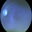

In [27]:
cv2_imshow(data[4000])

In [28]:
data[0].shape

(32, 32, 3)

In [29]:
data[1000].shape

(32, 32, 3)

In [30]:
X = np.array(data)
Y = np.array(Y)

In [31]:
print(X.shape)

(4217, 32, 32, 3)


In [32]:
type(X)

numpy.ndarray

In [33]:
type(Y)

numpy.ndarray

In [34]:
print(Y.shape)

(4217,)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [37]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

In [38]:
import tensorflow as tf
from tensorflow import keras

In [40]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [41]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [42]:
num_of_classes = 4

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [43]:
model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
95/95 [==============================] - 42s 441ms/step - loss: 1.1166 - acc: 0.5470 - val_loss: 2.1651 - val_acc: 0.2485
Epoch 2/5
95/95 [==============================] - 37s 394ms/step - loss: 0.7113 - acc: 0.7275 - val_loss: 2.5620 - val_acc: 0.2485
Epoch 3/5
95/95 [==============================] - 38s 399ms/step - loss: 0.5514 - acc: 0.8040 - val_loss: 4.0747 - val_acc: 0.2485
Epoch 4/5
95/95 [==============================] - 38s 402ms/step - loss: 0.4289 - acc: 0.8626 - val_loss: 3.6335 - val_acc: 0.2485
Epoch 5/5
95/95 [==============================] - 38s 403ms/step - loss: 0.3500 - acc: 0.8913 - val_loss: 4.2047 - val_acc: 0.3314


In [47]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
95/95 [==============================] - 38s 400ms/step - loss: 0.3137 - acc: 0.9038 - val_loss: 5.8140 - val_acc: 0.3077
Epoch 2/5
95/95 [==============================] - 38s 404ms/step - loss: 0.2934 - acc: 0.9028 - val_loss: 4.7891 - val_acc: 0.3757
Epoch 3/5
95/95 [==============================] - 39s 406ms/step - loss: 0.2683 - acc: 0.9173 - val_loss: 3.2517 - val_acc: 0.3876
Epoch 4/5
95/95 [==============================] - 39s 408ms/step - loss: 0.2056 - acc: 0.9476 - val_loss: 1.3956 - val_acc: 0.4556
Epoch 5/5
95/95 [==============================] - 39s 409ms/step - loss: 0.2132 - acc: 0.9404 - val_loss: 1.0396 - val_acc: 0.6213


In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
95/95 [==============================] - 38s 401ms/step - loss: 0.1567 - acc: 0.9575 - val_loss: 0.5506 - val_acc: 0.7722
Epoch 2/5
95/95 [==============================] - 38s 405ms/step - loss: 0.1183 - acc: 0.9697 - val_loss: 0.4943 - val_acc: 0.8225
Epoch 3/5
95/95 [==============================] - 39s 406ms/step - loss: 0.0990 - acc: 0.9819 - val_loss: 0.4857 - val_acc: 0.8462
Epoch 4/5
69/95 [====================>.........] - ETA: 10s - loss: 0.0814 - acc: 0.9855

In [50]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

27/27 [==============================] - 3s 109ms/step - loss: 0.3298 - acc: 0.8969
0.3297613859176636
0.8969194293022156


In [52]:
Y_pred = model.predict(X_test)

27/27 [==============================] - 5s 110ms/step


In [53]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_pred_labels

[0,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 3,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 3,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 3,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 0,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 0,
 2,
 3,
 3,
 1,
 3,
 0,
 3,
 1,
 1,
 0,
 1,
 0,
 3,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 3,
 0,
 0,
 1,
 2,
 0,
 0,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 2,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 0,
 2,
 1,
 0,
 3,
 2,
 3,
 1,
 0,
 0,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 2,


In [54]:
from tensorflow.math import confusion_matrix

In [56]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

<Axes: >

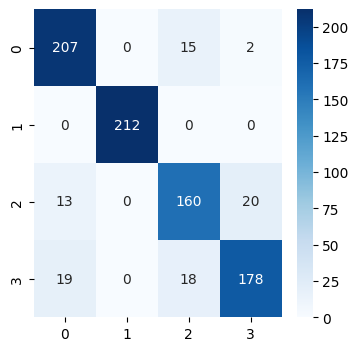

In [58]:
plt.figure(figsize = (4,4))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')